In [25]:
#物件(object)建構式
class sample:
    
    def __init__(self,ID,sex,Li,age,result):
        self.ID = ID
        self.sex = sex
        self.Li = Li
        self.age = age
        self.result = result

        

In [27]:
#讀取資料，建立dataframe

import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import matplotlib.pyplot as plt

file_name = input('檔案名稱：')
file = open('D:\\YAO\\DATA\\%s.csv'%file_name,encoding='big5')
data_list = []
for i in file.readlines():
    data = i.strip()
    data = data.split(',')
    data_list.append(data)
file.close()

file_df = pd.DataFrame(data_list[1:],columns=data_list[0])

condiction = input('是否列印DATAFRAME(y/n)：')
if condiction == 'y':
    print('csv資料：')
    print(file_df)
    print('----------------')

檔案名稱：三民_高雄老人20170216
是否列印DATAFRAME(y/n)：y
csv資料：
       ID Sex   Li Age    Result
0    S208   2  灣勝里  39  Negative
1    S320   1  寶興里  40  Negative
2    S211   1  灣利里  41  Negative
3    S212   2  灣利里  41  Positive
4    S373   2  鼎中里  41  Negative
5    S402   1  鼎力里  42  Negative
6    S278   1  寶國里  42  Negative
7    S313   1  寶興里  43  Negative
8    S321   2  寶興里  43  Negative
9    S389   1  鼎金里  43  Negative
10   S204   1  灣利里  44  Positive
11   S322   1  正興里  44  Negative
12   S386   2  鼎泰里  44  Negative
13   S502   1  鼎盛里  44  Negative
14   S206   2  正興里  45  Positive
15   S307   1  寶國里  45  Negative
16   S308   1  寶興里  45  Negative
17   S305   2  寶興里  46  Negative
18   S505   2  鼎中里  46  Negative
19   S281   2  寶國里  47  Negative
20   S306   2  正興里  47  Negative
21   S523   2  鼎盛里  48  Negative
22   S378   2  鼎西里  49  Negative
23   S392   2  鼎西里  49  Positive
24   S400   1  鼎中里  49  Negative
25   S501   1  鼎西里  49  Negative
26   S503   1  鼎西里  49  Negative
27   S388   2  鼎力里  50  Pos

In [28]:
#建立物件:
ID = list(file_df.ix[:,'ID'])
sex = list(file_df.ix[:,'Sex'])
Li = list(file_df.ix[:,'Li'])
age = list(map(int,list(file_df.ix[:,'Age'])))
result = list(file_df.ix[:,'Result'])

#利用list建立物件
sample_ls = []
for i in range(len(file_df)):
    sample_ls.append(sample(ID[i],sex[i],Li[i],age[i],result[i]))

In [172]:
#先5歲年齡切切看
Age5Cutter = []
min1 = 0
max1 = 4
min_max = [min1,max1]
Age5Cutter.append(min_max)
for i in range(18):
    min1 += 5
    max1 += 5
    min_max = [min1,max1]
    Age5Cutter.append(min_max)
#print(Age5Cutter)

#算物件
ToPlot_5Age = []
for i in range(len(Age5Cutter)):
    cutted_age_number = sum(Age5Cutter[i][0] <= p.age <= Age5Cutter[i][1] for p in sample_ls)
    print('[%d - %d 歲]'%(Age5Cutter[i][0],Age5Cutter[i][1]),':',cutted_age_number)
    ToPlot_5Age.append([Age5Cutter[i],cutted_age_number ])

#最大最小年齡   
print("最小年齡:",min(p.age for p in sample_ls),'歲')
print("最大年齡:",max(p.age for p in sample_ls),'歲')

[0 - 4 歲] : 0
[5 - 9 歲] : 0
[10 - 14 歲] : 0
[15 - 19 歲] : 0
[20 - 24 歲] : 0
[25 - 29 歲] : 2
[30 - 34 歲] : 2
[35 - 39 歲] : 2
[40 - 44 歲] : 3
[45 - 49 歲] : 2
[50 - 54 歲] : 8
[55 - 59 歲] : 5
[60 - 64 歲] : 2
[65 - 69 歲] : 13
[70 - 74 歲] : 6
[75 - 79 歲] : 3
[80 - 84 歲] : 1
[85 - 89 歲] : 0
[90 - 94 歲] : 0
最小年齡: 26 歲
最大年齡: 80 歲


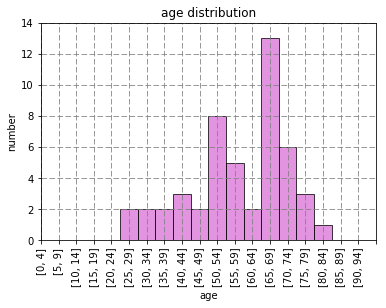

In [133]:
#Age的Histogram
hist_age_ls = list(p.age for p in sample_ls)
plt.hist(hist_age_ls, alpha=0.75,rwidth=True,bins=range(5,100,5),edgecolor='black', linewidth=1, facecolor='orchid')

plt.xlabel('age')
plt.ylabel('number')
plt.title('age distribution')
plt.axis([20, 90, 0, 14])
xticks = [2.5]
start = 2.5
for i in range(len(Age5Cutter)):
    start += 5
    xticks.append(start)

plt.xticks( xticks,Age5Cutter , rotation=90  )
plt.grid(linestyle='--', which='major',color='gray')
plt.show()

In [24]:
#切年紀

age_cutters = []
i = 1
print('切點為：[?-?]')
while True:
    age_cutter_min = eval(input('請輸入第%d個區間範圍的最小值：'%i))
    age_cutter_max = eval(input('請輸入第%d個區間範圍的最大值：'%i))
    age_cutter = [age_cutter_min,age_cutter_max]
    age_cutters.append(age_cutter)
    print('第%d切點為：[%d-%d]'%(i,age_cutter_min,age_cutter_max))
    print('-------------------')
    i += 1
    ask = input('是否結束輸入(y/n):')
    if ask == 'y':
        break
print('age_cutters：',age_cutters)
print('--------已經切好年齡，物件名稱為：age_cutters---------')



切點為：[?-?]
請輸入第1個區間範圍的最小值：26
請輸入第1個區間範圍的最大值：80
第1切點為：[26-80]
-------------------
是否結束輸入(y/n):y
age_cutters： [[26, 80]]
--------已經切好年齡，物件名稱為：age_cutters---------


In [25]:
#區分各年齡pos和neg數目
aged_PosNeg_ls = []
for i in range(len(age_cutters)):   
    pos_number = sum(age_cutters[i][0] <= p.age <= age_cutters[i][1] and p.result=='Positive' for p in sample_ls)
    neg_number = sum(age_cutters[i][0] <= p.age <= age_cutters[i][1] and p.result=='Negative' for p in sample_ls)
    aged_PosNeg_ls.append([pos_number ,neg_number]) 
    
print('可利用list：age_cutters 和 aged_PosNeg_ls')

#存成chisqure表格模式:
os.chdir('D:\\YAO\\output')
f1 = open('--output--年齡chisquare表格.csv','w')
f1.write('年齡'+','+'Positive'+','+'Negative'+','+'Total'+'\n')
total_pos = 0
total_neg = 0
for i in range(len(aged_PosNeg_ls)):
    total_perage = aged_PosNeg_ls[i][0] + aged_PosNeg_ls[i][1]
    
    f1.write('%d - %d歲'%(age_cutters[i][0],age_cutters[i][1]) + ',')
    f1.write(str(aged_PosNeg_ls[i][0]))
    f1.write(',')
    f1.write(str(aged_PosNeg_ls[i][1]))
    f1.write(',')
    f1.write(str(total_perage))
    f1.write('\n')
    
    total_pos += aged_PosNeg_ls[i][0]
    total_neg += aged_PosNeg_ls[i][1]
    
f1.write('Total'+',')
f1.write(str(total_pos))
f1.write(',')
f1.write(str(total_neg))
f1.write(',')
f1.write(str(total_neg + total_pos))
f1.write('\n')
f1.close()


可利用list：age_cutters 和 aged_PosNeg_ls


In [156]:
#先5歲年齡切切看
Age5Cutter = []
min1 = 0
max1 = 4
min_max = [min1,max1]
Age5Cutter.append(min_max)
for i in range(20):
    min1 += 5
    max1 += 5
    min_max = [min1,max1]
    Age5Cutter.append(min_max)
#print(Age5Cutter)

#算物件
for i in range(len(Age5Cutter)):
    print(Age5Cutter[i],':',sum(Age5Cutter[i][0] <= p.age <= Age5Cutter[i][1] for p in sample_ls))
#最大最小年齡   
print("最小:",min(p.age for p in sample_ls))
print("最大:",max(p.age for p in sample_ls))

[0, 4] : 0
[5, 9] : 0
[10, 14] : 0
[15, 19] : 0
[20, 24] : 0
[25, 29] : 0
[30, 34] : 0
[35, 39] : 1
[40, 44] : 13
[45, 49] : 13
[50, 54] : 22
[55, 59] : 28
[60, 64] : 44
[65, 69] : 158
[70, 74] : 130
[75, 79] : 85
[80, 84] : 35
[85, 89] : 16
[90, 94] : 3
[95, 99] : 0
[100, 104] : 0
最小: 39
最大: 92


In [188]:
#object filter練習  [依照不同ID代號 。建立新的物件list]：
ID_code = input('請輸入ID代號(一碼)：')

if len(ID_code)==1:
    list_ID=list(p.ID[0]==ID_code for p in sample_ls) #list(True or False)
    sample_ls_fil1 = [] 
    for i in range(len(sample_ls)):
        if list_ID[i]:
            sample_ls_fil1.append(sample_ls[i])
elif len(ID_code)==2:
    list_ID=list(p.ID[0:2]==ID_code for p in sample_ls)
    sample_ls_fil1 = [] 
    for i in range(len(sample_ls)):
        if list_ID[i]:
            sample_ls_fil1.append(sample_ls[i])
print('依照ID代號過濾後的物件集合為:sample_ls_fil1')

請輸入ID代號(一碼)：WC
依照ID代號過濾後的物件集合為:sample_ls_fil1


In [12]:
a = sample(1,2,3,4,5)
b = sample(6,7,8,9,10)
c = sample.all()

AttributeError: type object 'sample' has no attribute 'all'

In [24]:
stats.percentile([1,2,23,33,2,2,4,5,3,4],0.5)

AttributeError: module 'scipy.stats' has no attribute 'percentile'

In [38]:
age_ls = list(file_df.ix[:,'Age'])

median()

AttributeError: module 'math' has no attribute 'median'

In [39]:
def median(mylist):
    sorts = sorted(mylist)
    length = len(sorts)
    if not length % 2:
        return (sorts[length / 2] + sorts[length / 2 - 1]) / 2.0
    return sorts[length / 2]


In [48]:
age_ls = list(file_df.ix[:,'Age'])
age_ls = list(map(int,age_ls))
print(np.median(age_ls))
print(stats.mode(age_ls))

69.0
ModeResult(mode=array([67]), count=array([36]))


In [50]:
stats.

TypeError: 'rv_frozen' object is not iterable